<a href="https://colab.research.google.com/github/TirendazAcademy/Awesome-Data-Science-Resources/blob/main/Twitter%20Sentiment%20Analysis%20with%2020000%20tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Perform a Twitter Sentiment Analysis with Snscrape and Hugging Face

What do football lovers think about the FIFA World Cup 2022? To find out that, I'll perform a Twitter sentiment analysis using the hashtag #WorldCup2022 on Twitter. Here are what I'll cover in this blog:

- What is Sentiment Analysis?
- What is Social Media Scraping?
- How to scrape with Snscrape?
- How to perform Twitter sentiment analysis?

Let's get started!

# How to scrape with snscrape?

First, let's take a look at how to scrape the tweets with Snscrape.

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 3.1 MB/s 


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating a list to append all tweet attributes(data)
tweets = []

# Creating query
query = '#WorldCup2022 lang:en since:2022-11-20 until:2022-11-23'
q = sntwitter.TwitterSearchScraper(query)

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(q.get_items()):
    if i>1000:
        break
    tweets.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

# Converting data to dataframe
tweets_df = pd.DataFrame(tweets, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])
tweets_df.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,msmyoibae,2022-11-22 23:59:53+00:00,1,Twitter for Android,I really want to see MISAMO @JYPETWICE wear Ja...
1,FredrikBjrklu12,2022-11-22 23:59:30+00:00,0,Twitter for iPhone,It’s time 🇷🇸 #WorldCup2022 https://t.co/wqxEa0...
2,BillNicholov,2022-11-22 23:59:24+00:00,30,Twitter Web App,#Macedonia was so close to being in #WorldCup2...
3,mypalsammy,2022-11-22 23:59:06+00:00,0,Twitter Web App,Saudi Arabia declaring a public holiday to mar...
4,Watec_VIVID,2022-11-22 23:58:54+00:00,0,Twitter Web App,#Qatar racing to finish 'world's tallest slide...


# Twitter Sentiment Analysis with Hugging Face

Let's import the model we'll use for Twitter sentiment analysis.

In [3]:
!pip install transformers
from transformers import pipeline
sentiment_analysis = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 9.1 MB/s 
     |████████████████████████████████| 182 kB 62.1 MB/s 
     |████████████████████████████████| 7.6 MB 52.0 MB/s 


Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

After that let's find out the sentiment in each tweet with the for loop.

In [4]:
# Creating a list to append all tweet attributes(data)
tweet_sa = []

# Creating query
query = '#WorldCup2022 lang:en since:2022-11-20 until:2022-11-23'
q = sntwitter.TwitterSearchScraper(query)

# Predicting the sentiments of tweets
for i,tweet in enumerate(q.get_items()):
    if i>20000:
        break
    content = tweet.content
    sentiment = sentiment_analysis(content)
    tweet_sa.append({'tweet': content, 'sentiment': sentiment[0]['label'], 'date':tweet.date})

Let's convert data into a dataframe.

In [5]:
import pandas as pd
pd.set_option('max_colwidth', None)

# Converting data to dataframe
df = pd.DataFrame(tweet_sa)
df.head()

,tweet,sentiment,date
0,I really want to see MISAMO @JYPETWICE wear Japan's football Jerseeyyy!! #GERJPN #WorldCup2022,positive,2022-11-22 23:59:53+00:00
1,It’s time 🇷🇸 #WorldCup2022 https://t.co/wqxEa0N521,positive,2022-11-22 23:59:30+00:00
2,"#Macedonia was so close to being in #WorldCup2022, would've been great to play against West #France (formerly France),North #Mexico (formerly #USA) et al. Everything #French is now #German, #American is #Mexican.Confused? They forcibly changed our name/identity. We change theirs. https://t.co/CQrVU5nvVR",positive,2022-11-22 23:59:24+00:00
3,Saudi Arabia declaring a public holiday to mark their win over Argentina is some excellent World Cupping. #WorldCup2022 \n\n(Sigh: I say this knowing when the queen took a dirt nap we still hadda show up to work in most of Canada...a day off is a day off; the why never matters.) https://t.co/yLvsXBUrAB,positive,2022-11-22 23:59:06+00:00
4,#Qatar racing to finish 'world's tallest slide' waterpark before #WorldCup #WorldcupQatar2022 #WorldCup2022 ends https://t.co/yhgVPJckRt,neutral,2022-11-22 23:58:54+00:00


In [6]:
df.tail()

,tweet,sentiment,date
19996,Senegal will probably need to win their two remaining matches to qualify from this group. #WorldCup2022,neutral,2022-11-21 17:52:27+00:00
19997,Senegal nil Netherlands 1 90+8. Wow guess it’s going to continue with 8 added minutes. They’re not going with the typical +5. #WorldCup2022,neutral,2022-11-21 17:52:23+00:00
19998,"Netherlands doesn't deserve to win this match and Senegal was better all the time. Anyway, Netherlands was Lucky today but they won't go far in the Competition #WorldCup !! #WorldCup2022",negative,2022-11-21 17:52:21+00:00
19999,No #Sen no 😢 \n\nI’ve still hopes - #Sen for #WorldCup2022 https://t.co/c1OKhifv5u,negative,2022-11-21 17:52:18+00:00
20000,"first two #WorldCup2022 games I've watched have had a combined 18 minutes of injury time added to just the second halves of their games, that's mad",negative,2022-11-21 17:52:17+00:00


# Data Visualization

First, let's count the number of tweets by sentiments.

In [7]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

sentiment
negative    4193
neutral     7677
positive    8131
dtype: int64


Now let's draw a pie plot for the sentiments.

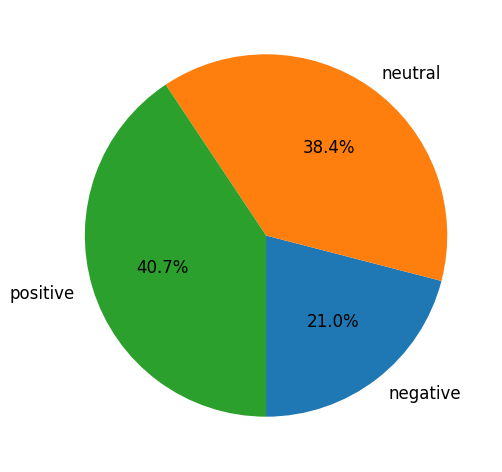

In [8]:
# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot()
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

Let's create a world cloud with positive tweets.

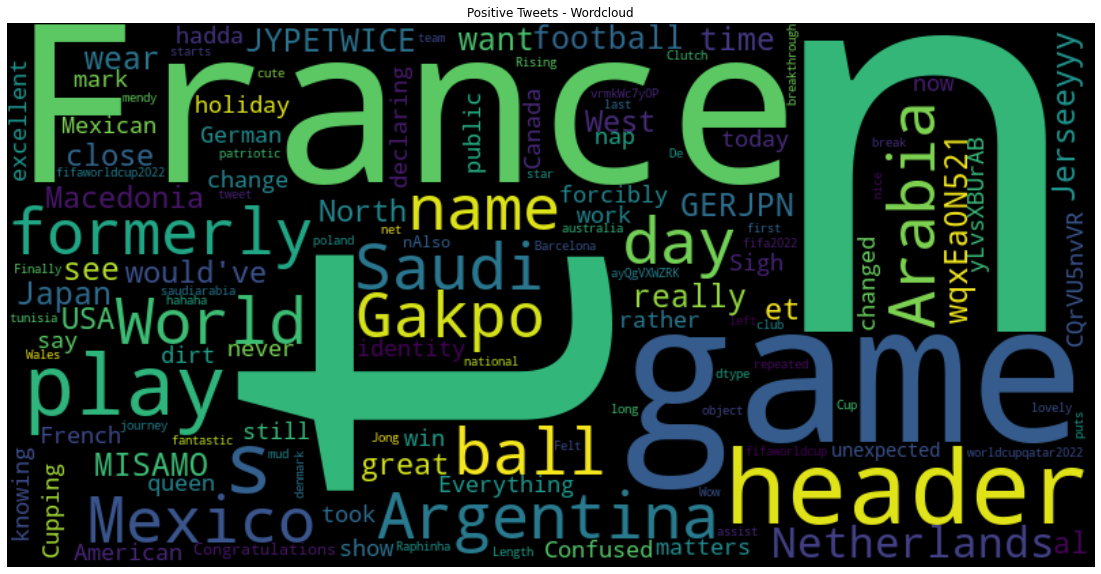

In [9]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'positive']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
positive_wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords = stop_words).generate(str(positive_tweets))
plt.figure(figsize=[20,10])
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Next, let's create a world cloud with positive tweets.

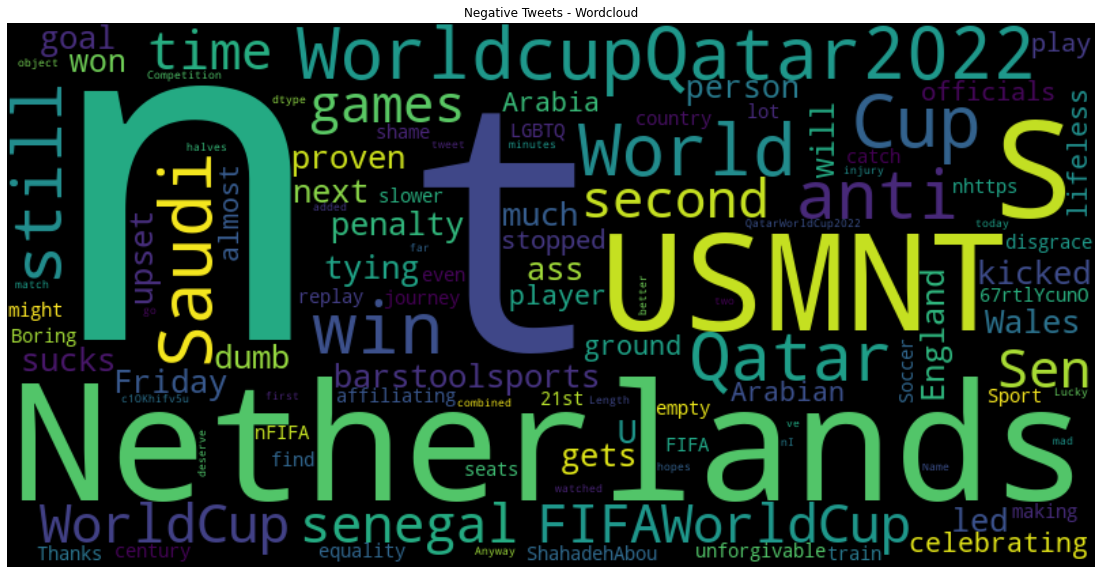

In [10]:
# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'negative']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
negative_wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords = stop_words).generate(str(negative_tweets))
plt.figure(figsize=[20,10])
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

That's it. Thanks for reading. I hope you enjoy it. You can find the notebook I used on this blog here. Don't forget to follow us on [YouTube](https://youtube.com/tirendazacademy) | [Twitter](https://twitter.com/TirendazAcademy) | [Instagram](https://www.instagram.com/tirendazacademy/) | [TikTok](https://www.tiktok.com/@tirendazacademy) 👍